___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project 
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

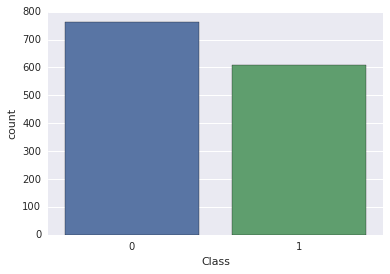

In [5]:
sns.countplot(x='Class',data=df)

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

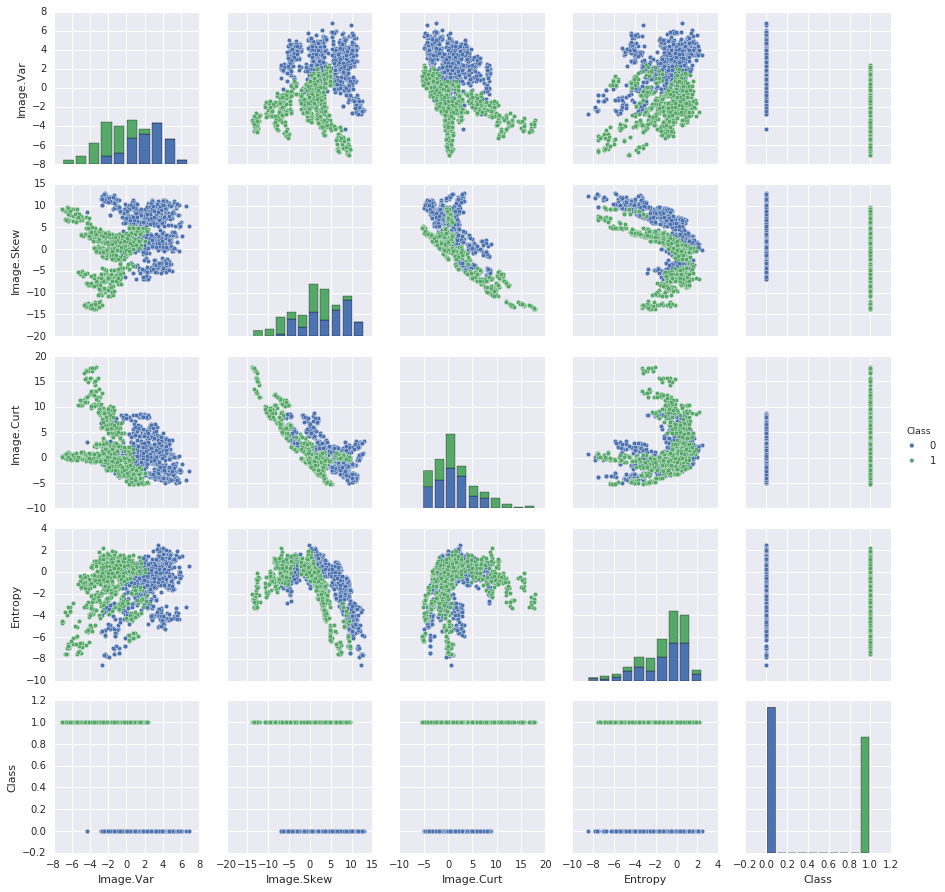

In [6]:
sns.pairplot(df,hue='Class')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling

** Import StandardScaler() from SciKit Learn**

In [7]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [8]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [9]:
col = df.columns

In [10]:
col

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy', 'Class'], dtype='object')

In [11]:
feat = df.drop('Class',axis=1)

In [12]:
scaled_df = scaler.fit(feat)

In [13]:
scaled_df

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [14]:
scaled_df.transform(feat)

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ..., 
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [15]:
sc_df = pd.DataFrame(scaled_df.transform(feat),columns=[u'Image.Var', u'Image.Skew', u'Image.Curt', u'Entropy'], dtype = 'float32')

In [16]:
sc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
Image.Var     1372 non-null float32
Image.Skew    1372 non-null float32
Image.Curt    1372 non-null float32
Entropy       1372 non-null float32
dtypes: float32(4)
memory usage: 21.5 KB


**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [17]:
sc_df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [18]:
import tensorflow as tf

In [19]:
X = sc_df


In [44]:
y = df['Class']

** Use the .as_matrix() method on X and Y and reset them equal to this result. We need to do this in order for TensorFlow to accept the data in Numpy array form instead of a pandas series. **

In [21]:
X = X.as_matrix()

In [45]:
y = y.as_matrix()

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [46]:
from sklearn.cross_validation import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Contrib.learn

** Import tensorflow.contrib.learn.python.learn as learn**

In [48]:
import tensorflow.contrib.learn.python.learn as learn

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [26]:
import tensorflow as tf
import numpy as np

# Data sets
IRIS_TRAINING = "iris_training.csv"
IRIS_TEST = "iris_test.csv"

# Load datasets.
training_set = tf.contrib.learn.datasets.base.load_csv(filename=IRIS_TRAINING, target_dtype=np.int)
test_set = tf.contrib.learn.datasets.base.load_csv(filename=IRIS_TEST, target_dtype=np.int)

x_train, x_test, y_train, y_test = training_set.data, test_set.data, \
  training_set.target, test_set.target

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3)

# Fit model.
classifier.fit(x=x_train, y=y_train, steps=200)

# Evaluate accuracy.
accuracy_score = classifier.evaluate(x=x_test, y=y_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))

# Classify two new flower samples.
new_samples = np.array(
    [[6.4, 3.2, 4.5, 1.5], [5.8, 3.1, 5.0, 1.7]], dtype=float)
y = classifier.predict(new_samples)
print ('Predictions: {}'.format(str(y)))

AttributeError: module 'tensorflow.contrib.learn.python.learn.datasets.base' has no attribute 'load_csv'

In [53]:
classifier = learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3,feature_columns=None)

Explicitly set `enable_centered_bias` to 'True' if you want to keep existing behaviour.


In [50]:
y_train.shape

(960,)

** Now fit classifier to the training data. Use steps=200 with a batch_size of 20. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [51]:
classifier.fit(X_train, y_train, steps=200, batch_size=20)

TypeError: 'NoneType' object is not iterable

## Model Evaluation

** Use the predict method from the classifier model to create predictions from X_test **

In [52]:
y

array([0, 0, 0, ..., 1, 1, 1])

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

[[237   0]
 [  1 174]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       237
          1       1.00      0.99      1.00       175

avg / total       1.00      1.00      1.00       412



## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99       237
          1       0.98      0.99      0.99       175

avg / total       0.99      0.99      0.99       412



[[233   4]
 [  1 174]]


** It should have also done very well, but not quite as good as the DNN model. Hopefully you have seen the power of DNN! **

# Great Job!